In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

# If you did not create the yellow color stream before go back to Ex4

In [3]:
qid  = 'reasoning2'
tbox = 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl'
frmt = 'JSON'
body = '''
    
    SELECT (COUNT(?p) AS ?cntPrimary) (COUNT(?d) AS ?cntDerived) (?cntPrimary > ?cntDerived AS ?morePrimaryThanDerived)
    FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
    FROM NAMED WINDOW <gw> ON <http://greenstream:2255/green> [RANGE PT15S STEP PT5S]
    FROM NAMED WINDOW <bw> ON <http://bluestream:3255/blue> [RANGE PT15S STEP PT5S]
    FROM NAMED WINDOW <yw> ON <http://jasper:8181/jasper/streams/yellow> [RANGE PT15S STEP PT5S]
    WHERE {
        { WINDOW ?pw { ?p a <http://www.streamreasoning.org/ontologies/2018/9/colors#Primary> . }}
        UNION
        { WINDOW ?dw { ?d a <http://www.streamreasoning.org/ontologies/2018/9/colors#Derived>. }}
    }

    '''

In [4]:
reasoning2q = jasper.create(qid, body, tbox, frmt)

In [5]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [6]:
endpoint = reasoning2q.stream().endpoints()[0]

In [7]:
resp = endpoint.call()

In [8]:
resp.flatten()

In [9]:
df = resp.flatten().dataframe(['results_bindings_0_cntPrimary_value', 'results_bindings_0_cntDerived_value'])
df

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntDerived_datatype,results_bindings_0_cntDerived_type,results_bindings_0_cntDerived_value,results_bindings_0_cntPrimary_datatype,results_bindings_0_cntPrimary_type,results_bindings_0_cntPrimary_value,results_bindings_0_morePrimaryThanDerived_datatype,results_bindings_0_morePrimaryThanDerived_type,results_bindings_0_morePrimaryThanDerived_value
0,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,100,http://www.w3.org/2001/XMLSchema#integer,literal,223,http://www.w3.org/2001/XMLSchema#boolean,literal,true
1,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,100,http://www.w3.org/2001/XMLSchema#integer,literal,225,http://www.w3.org/2001/XMLSchema#boolean,literal,true
2,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,110,http://www.w3.org/2001/XMLSchema#integer,literal,245,http://www.w3.org/2001/XMLSchema#boolean,literal,true
3,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,110,http://www.w3.org/2001/XMLSchema#integer,literal,247,http://www.w3.org/2001/XMLSchema#boolean,literal,true
4,cntPrimary,cntDerived,morePrimaryThanDerived,http://www.w3.org/2001/XMLSchema#integer,literal,110,http://www.w3.org/2001/XMLSchema#integer,literal,247,http://www.w3.org/2001/XMLSchema#boolean,literal,true


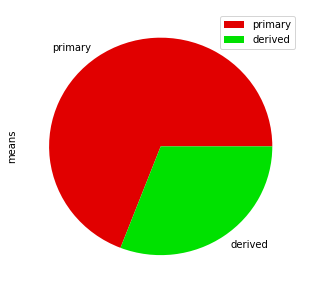

In [10]:
%matplotlib inline
import pandas as pd

df1 = df[['results_bindings_0_cntPrimary_value','results_bindings_0_cntDerived_value']]
cntg_mean = df1['results_bindings_0_cntPrimary_value'].mean()
cntr_mean = df1['results_bindings_0_cntDerived_value'].mean()

df = pd.DataFrame({'means': [cntg_mean, cntr_mean]}, index=['primary', 'derived'])
plot = df.plot.pie(y='means', colors=["#e10000", "#00e100"], figsize=(5, 5))